In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Loan%20Approval%20Prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
num_features = ["ApplicantIncome", 	"CoapplicantIncome" , "LoanAmount" , "Loan_Amount_Term" , "Credit_History"]

cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed' , 'Property_Area', 'Loan_Status']

In [8]:
df['ApplicantIncome'].mean()

5403.459283387622

In [9]:
df['Gender'].mode()[0]

'Male'

In [10]:
for col in num_features:
  df[col] = df[col].fillna(df[col].mean())

for col in cat_features:
  df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [12]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df['ApplicantIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [14]:
df = df.drop(['Loan_ID' , 'CoapplicantIncome'] , axis = 'columns')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,6091.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,4941.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,141.000000,360.0,1.0,Urban,Y


In [15]:
df.nunique()

Gender                2
Married               2
Dependents            4
Education             2
Self_Employed         2
ApplicantIncome     554
LoanAmount          204
Loan_Amount_Term     11
Credit_History        3
Property_Area         3
Loan_Status           2
dtype: int64

In [16]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Dependents'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())

['Male' 'Female']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


In [17]:
df1 = df.copy()

In [44]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,6091.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,4941.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,141.000000,360.0,1.0,Urban,Y


In [45]:
label_encoding_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed' , 'Loan_Status']

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in label_encoding_columns:
  df1[col] = encoder.fit_transform(df1[col])

In [46]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,146.412162,360.0,1.0,Urban,1
1,1,1,1,0,0,6091.0,128.000000,360.0,1.0,Rural,0
2,1,1,0,0,1,3000.0,66.000000,360.0,1.0,Urban,1
3,1,1,0,1,0,4941.0,120.000000,360.0,1.0,Urban,1
4,1,0,0,0,0,6000.0,141.000000,360.0,1.0,Urban,1


In [20]:
pd.get_dummies(df1['Property_Area'])

,Rural,Semiurban,Urban
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
609,True,False,False
610,True,False,False
611,False,False,True
612,False,False,True


In [47]:
df2 = pd.get_dummies(df1)
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849.0,146.412162,360.0,1.0,1,False,False,True
1,1,1,1,0,0,6091.0,128.000000,360.0,1.0,0,True,False,False
2,1,1,0,0,1,3000.0,66.000000,360.0,1.0,1,False,False,True
3,1,1,0,1,0,4941.0,120.000000,360.0,1.0,1,False,False,True
4,1,0,0,0,0,6000.0,141.000000,360.0,1.0,1,False,False,True


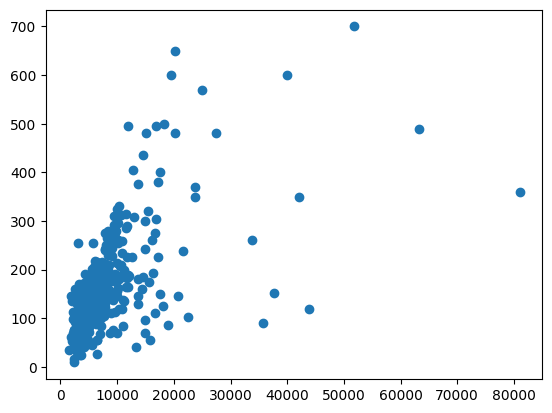

In [48]:
import matplotlib.pyplot as plt

plt.scatter(df2['ApplicantIncome'] , df2['LoanAmount'])

plt.show()

In [22]:
X = df2.drop('Loan_Status' , axis = 'columns')
Y = df2['Loan_Status']

In [49]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()

Xr,Yr = sampler.fit_resample(X,Y)

ModuleNotFoundError: No module named 'imblearn'

In [50]:
Yr.value_counts()


NameError: name 'Yr' is not defined

In [23]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size = 0.75)

In [51]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(xtrain)

xtrainScaled = scaler.transform(xtrain)
xtestScaled = scaler.transform(xtest)

In [52]:
dfscaled = pd.DataFrame(xtrainScaled , columns = xtrain.columns)
dfscaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.000000,0.0,0.0,0.236192,0.681621,0.74359,1.0,1.0,0.0,0.0
1,1.0,1.0,0.000000,0.0,0.0,0.039280,0.153401,0.74359,1.0,0.0,1.0,0.0
2,1.0,1.0,0.666667,0.0,0.0,0.074889,0.299566,0.74359,0.0,0.0,0.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.039280,0.153401,0.74359,1.0,0.0,0.0,1.0
4,1.0,1.0,1.000000,0.0,0.0,0.051510,0.215630,0.74359,0.0,0.0,1.0,0.0


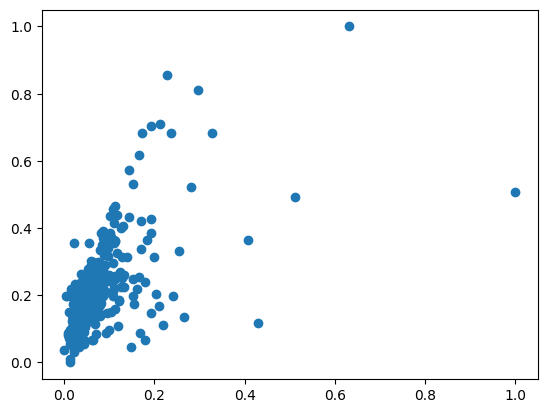

In [53]:
plt.scatter(dfscaled['ApplicantIncome'] , dfscaled['LoanAmount'])

plt.show()

In [54]:

from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=5)

model1.fit(xtrainScaled,ytrain)

KNeighborsClassifier()

In [55]:

from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()

model2.fit(xtrainScaled,ytrain)

LogisticRegression()

In [57]:

print("Training Data" , model1.score(xtrainScaled,ytrain))
print("Test Data" , model1.score(xtestScaled,ytest))

Training Data 0.8043478260869565
Test Data 0.7987012987012987


In [58]:

print("Training Data" , model2.score(xtrainScaled,ytrain))
print("Test Data" , model2.score(xtestScaled,ytest))

Training Data 0.8
Test Data 0.8441558441558441


In [35]:
import matplotlib.pyplot as plt

In [36]:
dfscaled = pd.DataFrame(xtrainScaled , columns = xtrain.columns)
dfscaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.000000,0.0,0.0,0.236192,0.681621,0.74359,1.0,1.0,0.0,0.0
1,1.0,1.0,0.000000,0.0,0.0,0.039280,0.153401,0.74359,1.0,0.0,1.0,0.0
2,1.0,1.0,0.666667,0.0,0.0,0.074889,0.299566,0.74359,0.0,0.0,0.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.039280,0.153401,0.74359,1.0,0.0,0.0,1.0
4,1.0,1.0,1.000000,0.0,0.0,0.051510,0.215630,0.74359,0.0,0.0,1.0,0.0


In [59]:
from sklearn.metrics import confusion_matrix

ytrainPred_1 = model1.predict(xtrainScaled)
ytestPred_1 = model1.predict(xtestScaled)

In [60]:
confusion_matrix(ytrain , ytrainPred_1)

array([[ 71,  79],
       [ 11, 299]], dtype=int64)

In [61]:
confusion_matrix(ytest, ytestPred_1)

array([[ 22,  20],
       [ 11, 101]], dtype=int64)